In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path
dataPath = Path()/'..'/'data'

In [2]:
# df_mobile = pd.read_csv((dataPath/'mobile'/'zerodData.csv'))
# df_stagnant = pd.read_csv((dataPath/'stagnant'/'zerodData.csv'))
# df_episodic = pd.read_csv((dataPath/'episodic'/'zerodData.csv'))
# df = pd.concat([df_mobile, df_stagnant, df_episodic])
df = pd.read_csv((dataPath/'mobile'/'zerodData.csv'))
df.columns = ''.join(list(df.columns.values))[2:].split(' ')

In [3]:
pca = PCA(n_components=2)

In [4]:
pca_result = pca.fit_transform(df.values)

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)
pcadf = pd.DataFrame(pca_result)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.99668331e-01 3.20563815e-04]


<IPython.core.display.Javascript object>


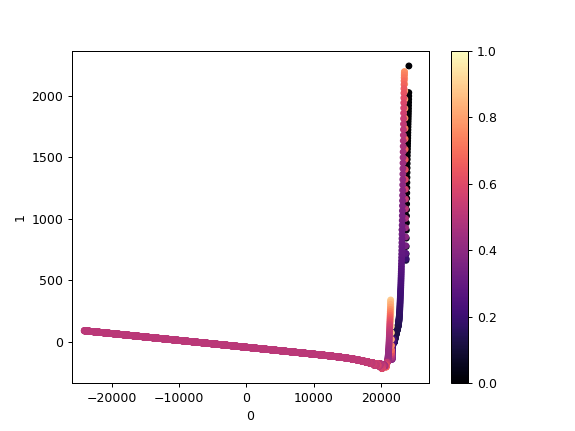

In [6]:
pcadf.plot.scatter(
    x = 0,
    y = 1,
    c = mpl.colors.Normalize()(df.Nu.values),
    cmap = 'magma'
    )

In [7]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4875 samples in 0.028s...
[t-SNE] Computed neighbors for 4875 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4875
[t-SNE] Computed conditional probabilities for sample 2000 / 4875
[t-SNE] Computed conditional probabilities for sample 3000 / 4875
[t-SNE] Computed conditional probabilities for sample 4000 / 4875
[t-SNE] Computed conditional probabilities for sample 4875 / 4875
[t-SNE] Mean sigma: 12.405809
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.941643
[t-SNE] KL divergence after 300 iterations: 1.075594


In [8]:
tsnedf = pd.DataFrame(tsne_results)

<IPython.core.display.Javascript object>


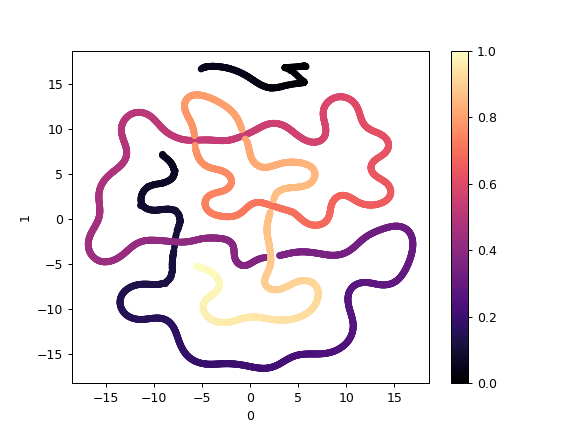

In [9]:
tsnedf.plot.scatter(
    x = 0,
    y = 1,
    c = mpl.colors.Normalize()(df.modeltime.values),
    cmap = 'magma'
    )

In [10]:
dataslice = df[['avTemp', 'avVisc', 'Nu', 'surfVRMS', 'VRMS']]

In [12]:
tsne3 = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne3_results = tsne3.fit_transform(dataslice.values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4875 samples in 0.017s...
[t-SNE] Computed neighbors for 4875 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4875
[t-SNE] Computed conditional probabilities for sample 2000 / 4875
[t-SNE] Computed conditional probabilities for sample 3000 / 4875
[t-SNE] Computed conditional probabilities for sample 4000 / 4875
[t-SNE] Computed conditional probabilities for sample 4875 / 4875
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.557461
[t-SNE] KL divergence after 300 iterations: 0.751951


In [13]:
tsne3df = pd.DataFrame(tsne3_results)

<IPython.core.display.Javascript object>


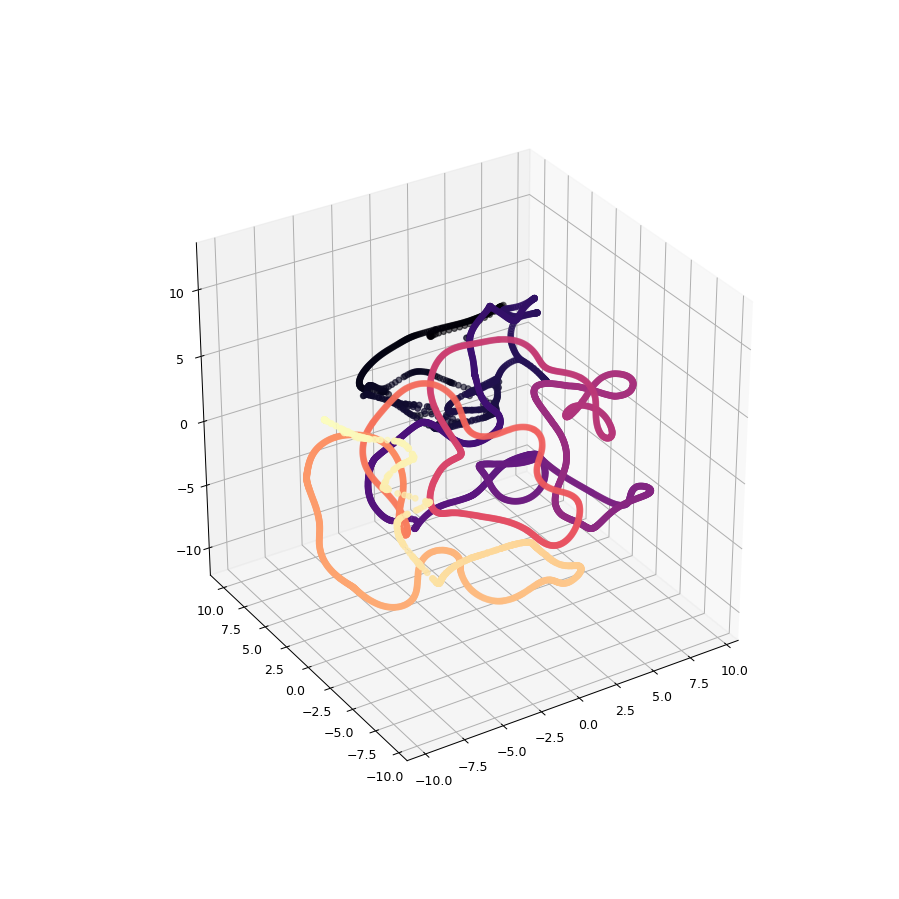

In [14]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    tsne3df[0],
    tsne3df[1],
    tsne3df[2],
    c = mpl.colors.Normalize()(df.modeltime.values),
    cmap = 'magma',
    )
plt.show()